In [1]:
# World Happiness 2015

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import squarify
from matplotlib import pyplot as plt
sns.set_style("white")
import warnings
warnings.filterwarnings("ignore")
#plt.style.use('bmh')
pd.set_option('display.max_columns', 500)
import random

In [3]:
data = pd.read_csv(r'D:\PycharmProjects\EDA-ML\Happiness\2015.csv')

In [4]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [5]:
data['Happiness Groups']=pd.cut(data['Happiness Score'],5)

In [6]:
# Country - Name of the country.
# Region - Region the country belongs to.
# Happiness Rank - Rank of the country based on the Happiness Score.
# Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."
# Standard Error - The standard error of the happiness score.
# Economy (GDP per Capita) - The extent to which GDP contributes to the calculation of the Happiness Score.
# Family - The extent to which Family contributes to the calculation of the Happiness Score
# Health (Life Expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score
# Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.
# Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score.
# Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.
# Dystopia Residual - The extent to which Dystopia Residual contributed to the calculation of the Happiness Score.

In [7]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Groups
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,"(6.637, 7.587]"
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,"(6.637, 7.587]"
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,"(6.637, 7.587]"
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,"(6.637, 7.587]"
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,"(6.637, 7.587]"


In [8]:
data.shape

(158, 13)

In [9]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 13 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
Happiness Groups                 158 non-null category
dtypes: category(1), float64(9), int64(1), object(2)
memory usage: 15.1+ KB


In [11]:
data.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual', 'Happiness Groups'],
      dtype='object')

In [12]:
data['Country'].value_counts().sort_values(ascending=False).head()

Iraq        1
Bhutan      1
Chile       1
Panama      1
Bulgaria    1
Name: Country, dtype: int64

In [13]:
pd.DataFrame(data['Happiness Score'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Happiness Score,158.0,5.375734,1.14501,2.839,4.526,5.2325,6.24375,7.587


In [14]:
colory = []
colors_score = data['Happiness Score'].sort_values(ascending=False)
for i in range(30):
    if colors_score[i] >= colors_score.quantile(0.95):
        colory.append('#0B486B')
    elif colors_score[i] >= colors_score.quantile(0.86):
            colory.append('#c55572')
    else:
            colory.append('#b3b7b8')

            
def autolabel(labs):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for lab in labs:
        height = lab.get_height()
        ax.annotate(('{}'.format(height))[:4],
                    xy=(lab.get_x() + lab.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


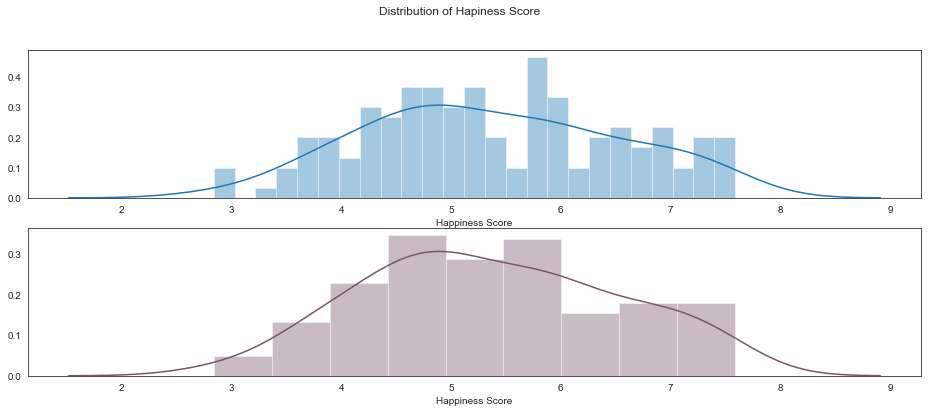

In [15]:
f,ax = plt.subplots(2,1,figsize=(16,6))
a0 = sns.distplot(data['Happiness Score'],bins=25,ax=ax[0])
a01 = sns.distplot(data['Happiness Score'],bins=9,ax=ax[1],color='#77566A')
plt.suptitle('Distribution of Hapiness Score');

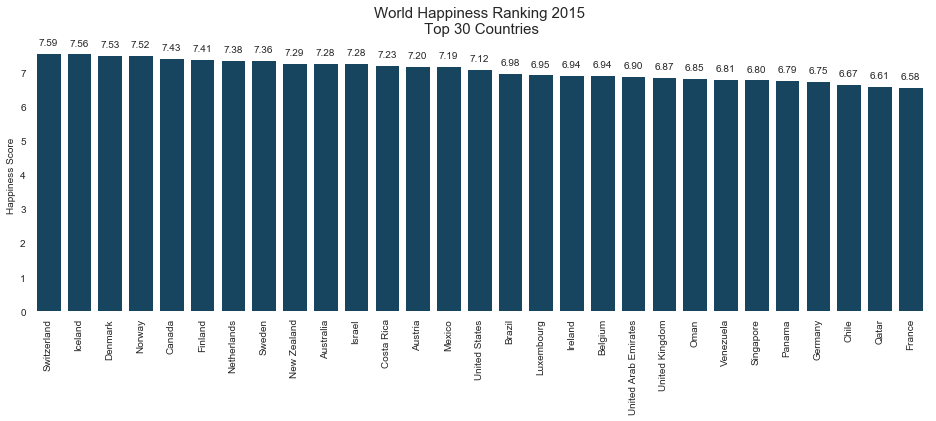

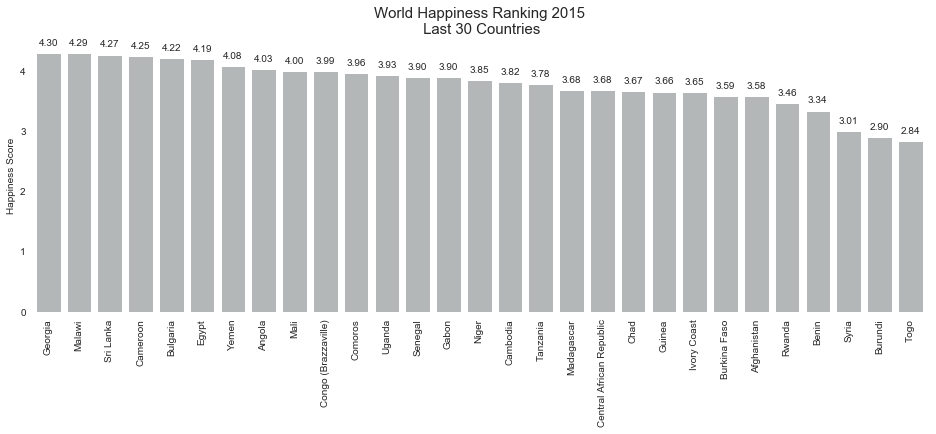

In [16]:
f,ax = plt.subplots(1,1,figsize=(16,5))
a1 = sns.barplot(x='Country',y='Happiness Score',data=data.head(29),ax=ax,color='#0B486B')
a1.set_xlabel('');
plt.xticks(rotation=90);
a1.set_title('World Happiness Ranking 2015\n Top 30 Countries',fontsize=15);
sns.despine(bottom=True,left=True);
for p in a1.patches:
    a1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
f,ax = plt.subplots(1,1,figsize=(16,5))    
a2 = sns.barplot(x='Country',y='Happiness Score',data=data.tail(29),ax=ax,color='#b3b7b8')
a2.set_xlabel('');
plt.xticks(rotation=90);
a2.set_title('World Happiness Ranking 2015\n Last 30 Countries',fontsize=15);
sns.despine(bottom=True,left=True);
for p in a2.patches:
    a2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

* Mean Happiness Score in 2015 was: 5.375734
* Most of countries has Happiness Score in range 4.5 - 6.5
* Top 5 Countries by Happiness Score are: 
    * Switzerland, 
    * Iceland, 
    * Denmark, 
    * Norwey, 
    * Canada 
* So we can see that in top 5 there are a lot of Nordic (Scandinavian) countries

* If we look at countries with lowest Happiness Score we can list:
    * Togo
    * Burundi
    * Syria
    * Benin
    * Rwanda

In [17]:
data.groupby('Region')['Happiness Score'].agg(['mean','count']).sort_values(by='mean',ascending=False).T

Region,Australia and New Zealand,North America,Western Europe,Latin America and Caribbean,Eastern Asia,Middle East and Northern Africa,Central and Eastern Europe,Southeastern Asia,Southern Asia,Sub-Saharan Africa
mean,7.285,7.273,6.689619,6.144682,5.626167,5.4069,5.332931,5.317444,4.580857,4.2028
count,2.000,2.000,21.000000,22.000000,6.000000,20.0000,29.000000,9.000000,7.000000,40.0000


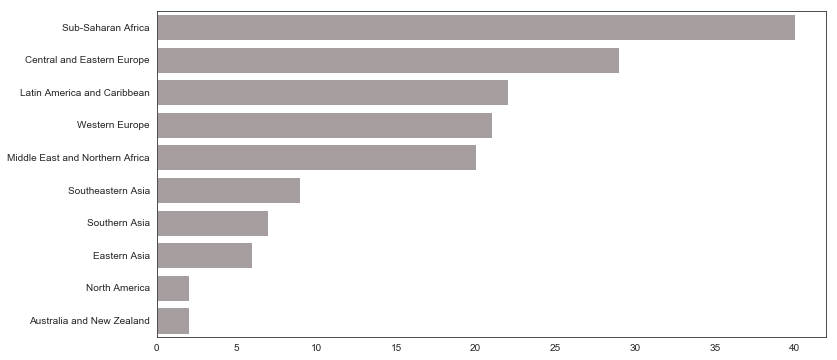

In [18]:
f,ax = plt.subplots(1,1,figsize=(12,6))
c0 = sns.barplot(y=data.groupby('Region')['Happiness Score'].count().sort_values(ascending=False).index,
            x= data.groupby('Region')['Happiness Score'].count().sort_values(ascending=False).values,palette=['#A89B9D'])
plt.xlabel('');
plt.ylabel('');

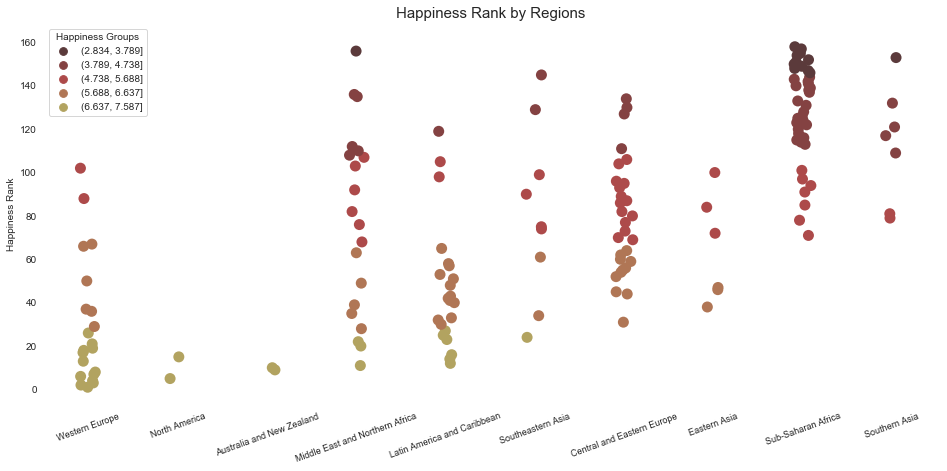

In [19]:
f,ax = plt.subplots(1,1,figsize=(16,7))
sp0 = sns.stripplot(x="Region", y="Happiness Rank", data=data, jitter=True,palette='tab20b_d',size=11,hue='Happiness Groups')
plt.xticks(rotation=20,fontsize=9);
plt.xlabel('');
sp0.set_title('Happiness Rank by Regions',fontsize=15);
sns.despine(left=True,bottom=True);

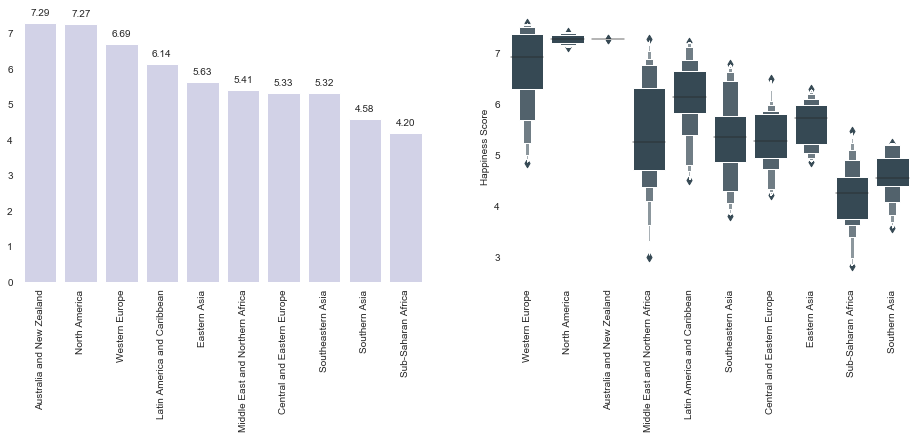

In [20]:
f,ax = plt.subplots(1,2,figsize=(16,5))
c1 = sns.barplot(x=data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).index,
            y= data.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False).values,ax=ax[0],palette=['#CFCFEA'])

#ax.set_xticklabels(labels, rotation=45)
for p in c1.patches:
    c1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')  
sns.despine(bottom=True, left=True)
c2 = sns.boxenplot(y='Happiness Score',x='Region',data=data,ax=ax[1],palette=['#314A59'])
plt.setp(c1.xaxis.get_majorticklabels(), rotation=90);
plt.setp(c2.xaxis.get_majorticklabels(), rotation=90);
c1.set_xlabel('');
c2.set_xlabel('');

In [21]:
regions = data['Region'].value_counts().index.to_list()
regions

['Sub-Saharan Africa',
 'Central and Eastern Europe',
 'Latin America and Caribbean',
 'Western Europe',
 'Middle East and Northern Africa',
 'Southeastern Asia',
 'Southern Asia',
 'Eastern Asia',
 'North America',
 'Australia and New Zealand']

In [22]:
cmaps = ['Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

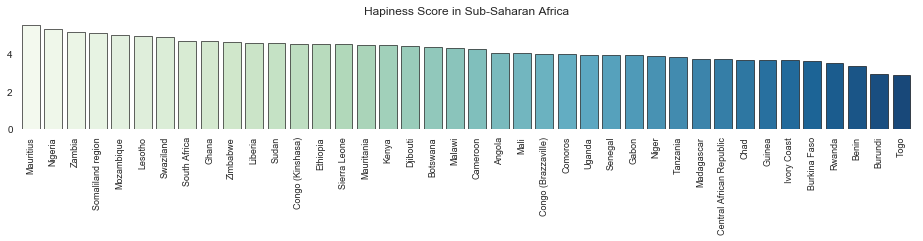

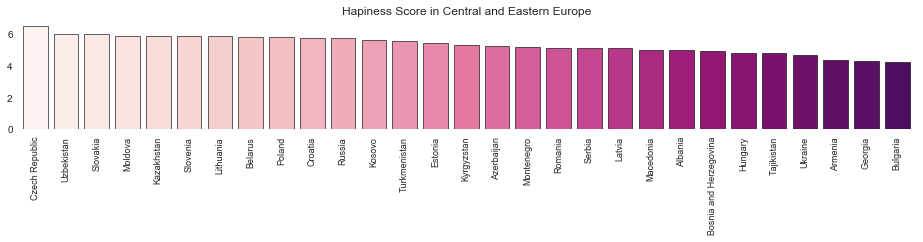

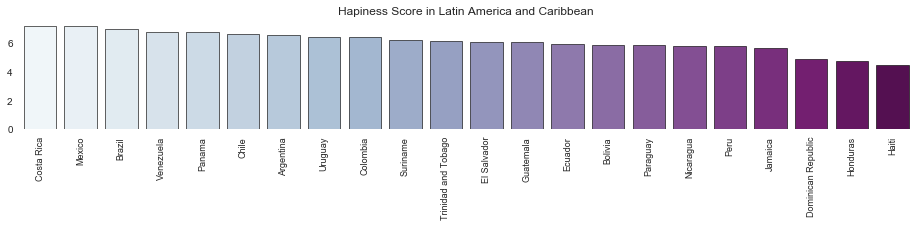

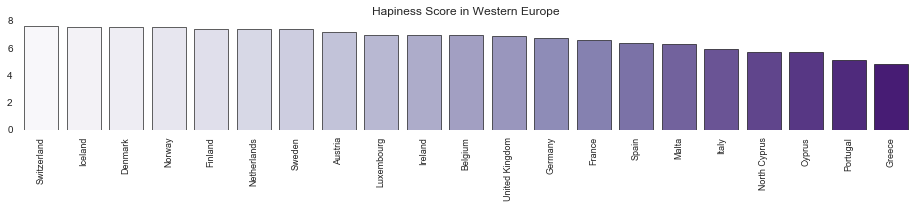

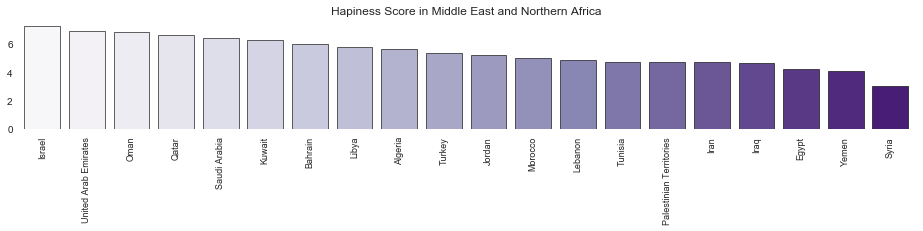

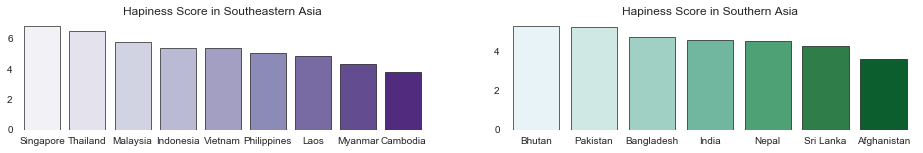

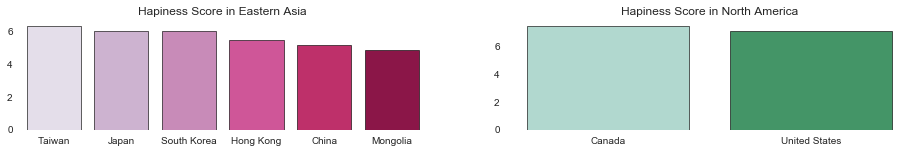

In [23]:
for i in regions[:5]:
    f,ax = plt.subplots(1,1,figsize=(16,2))
    o1 = sns.barplot(x='Country',y='Happiness Score',
                 data=data[data['Region']==i], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k')
    o1.set_xlabel('');
    o1.set_ylabel('');
    o1.tick_params(axis='x', rotation=90,labelsize=9)
    sns.despine(bottom=True,left=True);
    o1.set_title(f'Hapiness Score in {i}',fontsize=12);
    
f,ax = plt.subplots(1,2,figsize=(16,2))
o1 = sns.barplot(x='Country',y='Happiness Score',
                         data=data[data['Region']==regions[5]], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k',ax=ax[0])
o1.set_xlabel('');
o1.set_ylabel('');
#o1.tick_params(axis='x', rotation=90,labelsize=9)
sns.despine(bottom=True,left=True);
o1.set_title(f'Hapiness Score in {regions[5]}',fontsize=12);
o1 = sns.barplot(x='Country',y='Happiness Score',
                         data=data[data['Region']==regions[6]], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k',ax=ax[1])
o1.set_xlabel('');
o1.set_ylabel('');
#o1.tick_params(axis='x', rotation=90,labelsize=9)
sns.despine(bottom=True,left=True);
o1.set_title(f'Hapiness Score in {regions[6]}',fontsize=12);

f,ax = plt.subplots(1,2,figsize=(16,2))

o1 = sns.barplot(x='Country',y='Happiness Score',
                         data=data[data['Region']==regions[7]], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k',ax=ax[0])
o1.set_xlabel('');
o1.set_ylabel('');
#o1.tick_params(axis='x', rotation=90,labelsize=9)
sns.despine(bottom=True,left=True);
o1.set_title(f'Hapiness Score in {regions[7]}',fontsize=12);
o1 = sns.barplot(x='Country',y='Happiness Score',
                         data=data[data['Region']==regions[8]], palette=str(random.choice(cmaps)),linewidth=0.6,ec='k',ax=ax[1])
o1.set_xlabel('');
o1.set_ylabel('');
#o1.tick_params(axis='x', rotation=90,labelsize=9)
sns.despine(bottom=True,left=True);
o1.set_title(f'Hapiness Score in {regions[8]}',fontsize=12);

In [24]:
Top_Per_Region = pd.DataFrame(data.set_index('Country').groupby('Region')['Happiness Score'].nlargest(1)).reset_index()
Top_Per_Region['Region Country'] = Top_Per_Region['Country'] + ' (' + Top_Per_Region['Region']+')'

In [25]:
Top_Per_Region[['Country','Happiness Score']]

,Country,Happiness Score
0,New Zealand,7.286
1,Czech Republic,6.505
2,Taiwan,6.298
3,Costa Rica,7.226
4,Israel,7.278
5,Canada,7.427
6,Singapore,6.798
7,Bhutan,5.253
8,Mauritius,5.477
9,Switzerland,7.587


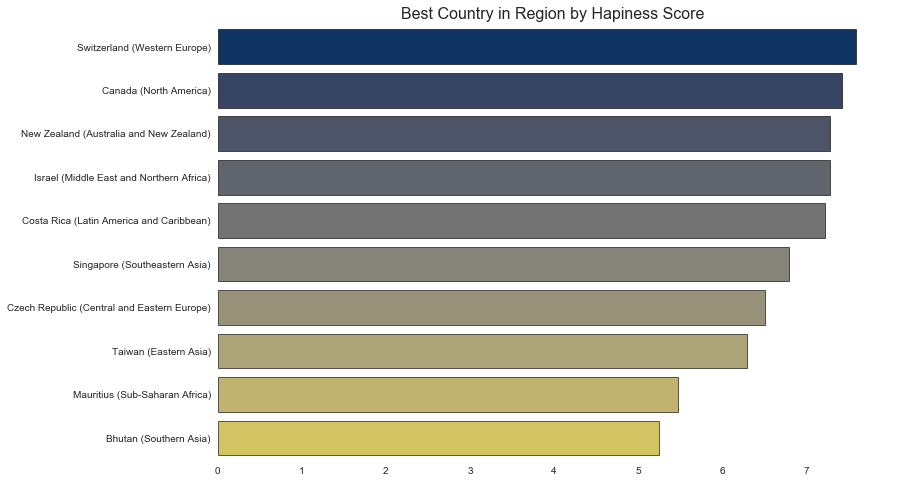

In [26]:
f,ax = plt.subplots(1,1,figsize=(12,8))

o1 = sns.barplot(y='Region Country',x='Happiness Score',
                         data=Top_Per_Region.sort_values(by='Happiness Score',ascending=False), palette='cividis',linewidth=0.6,ec='k')
o1.set_xlabel('');
o1.set_ylabel('');
sns.despine(bottom=True,left=True);
sns.despine(bottom=True,left=True);
o1.set_title(f'Best Country in Region by Hapiness Score',fontsize=16);

Top Happiness Score By regions: 
    
* New Zealand	7.286
* Czech Republic	6.505
* Taiwan	6.298
* Costa Rica	7.226
* Israel	7.278
* Canada	7.427
* Singapore	6.798
* Bhutan	5.253
* Mauritius	5.477
* Switzerland	7.587   

In [27]:
data.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


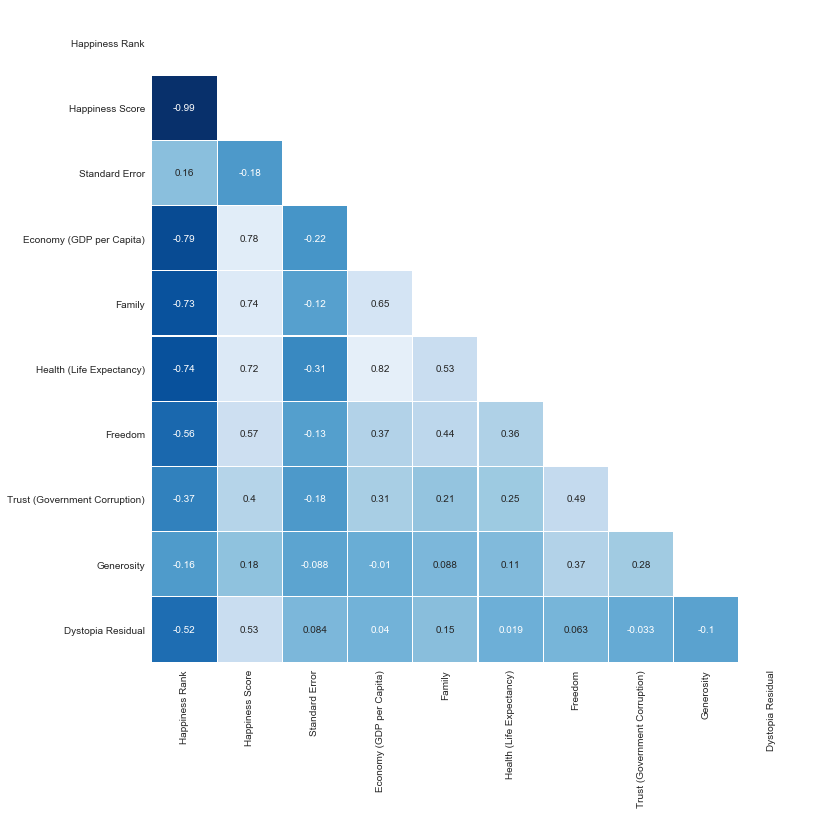

In [28]:
f,ax = plt.subplots(figsize=(12,12))
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(),cmap='Blues_r',annot=True,linewidths=.1,square=True,mask=mask,cbar=False);
#plt.title('Correlation map for Olympics Data',fontsize=15)

In [29]:
corrs = pd.DataFrame([data.corr()['Happiness Score'],np.abs(data.corr()['Happiness Score'])]).T
corrs.columns= ['Corr','Absolute Corr']

In [30]:
corrs

,Corr,Absolute Corr
Happiness Rank,-0.992105,0.992105
Happiness Score,1.000000,1.000000
Standard Error,-0.177254,0.177254
Economy (GDP per Capita),0.780966,0.780966
Family,0.740605,0.740605
Health (Life Expectancy),0.724200,0.724200
Freedom,0.568211,0.568211
Trust (Government Corruption),0.395199,0.395199
Generosity,0.180319,0.180319
Dystopia Residual,0.530474,0.530474


We can see very strong correlation between Happiness Score and :
* Economy (GDP per Capita):	__0.780966__
* Family:	__0.740605__
* Health (Life Expectancy):	__0.724200__  
  
And correlation between 
* Freedom	__0.568211__
* Trust (Government Corruption)	__0.395199__
* Dystopia Residual	__0.530474__
  
  
This factors seems to have influence on Happiness 

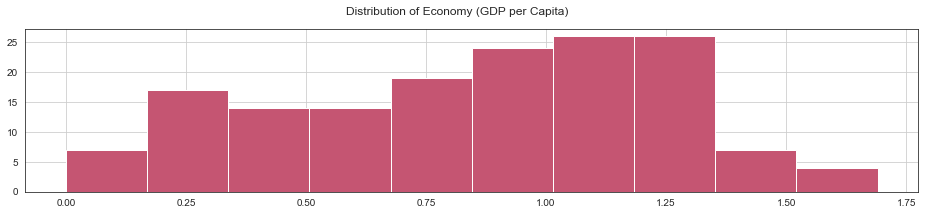

In [31]:
f,ax = plt.subplots(1,1,figsize=(16,3))
b0 = data['Economy (GDP per Capita)'].hist(color='#c55572')
plt.suptitle('Distribution of Economy (GDP per Capita)');

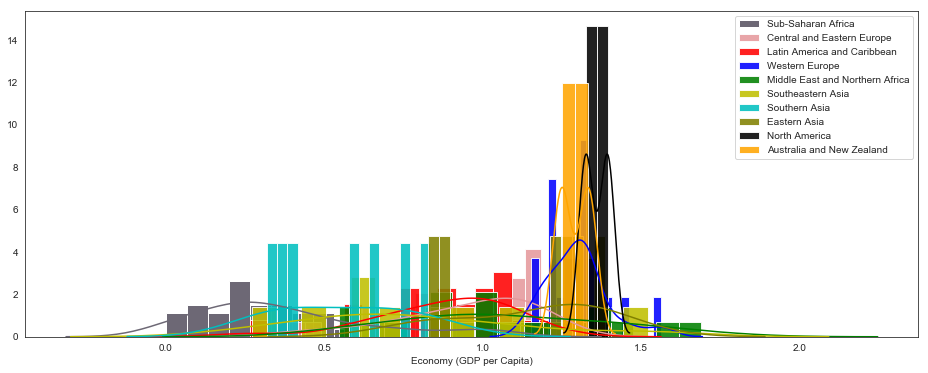

In [32]:
fig, ax = plt.subplots(figsize=(16,6))
sns.distplot( data[data['Region']==regions[0]]["Economy (GDP per Capita)"] , color="#6D6875", label=str(regions[0]),hist_kws=dict(alpha=1),bins=16)
sns.distplot( data[data['Region']==regions[1]]["Economy (GDP per Capita)"] , color="#E5989B", label=str(regions[1]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[2]]["Economy (GDP per Capita)"] , color="r",label=str(regions[2]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[3]]["Economy (GDP per Capita)"] , color="b", label=str(regions[3]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[4]]["Economy (GDP per Capita)"] , color="g", label=str(regions[4]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[5]]["Economy (GDP per Capita)"] , color="y", label=str(regions[5]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[6]]["Economy (GDP per Capita)"] , color="c", label=str(regions[6]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[7]]["Economy (GDP per Capita)"] , color="olive", label=str(regions[7]),hist_kws=dict(alpha=0.87),bins=16)
sns.distplot( data[data['Region']==regions[8]]["Economy (GDP per Capita)"] , color="k", label=str(regions[8]),hist_kws=dict(alpha=0.87),bins=2)
sns.distplot( data[data['Region']==regions[9]]["Economy (GDP per Capita)"] , color="orange", label=str(regions[9]),hist_kws=dict(alpha=0.87),bins=2)
plt.legend();

* We can see that most of countries has Economy (GDP per Capita) Indicator in range 0.75 - 1.25 
* Western Europe, North America and Australia & New Zeland has highest GDP Per Capita. 
* We can also see that African, Latin American and Central and Eastern Europe has very high variation in GDP

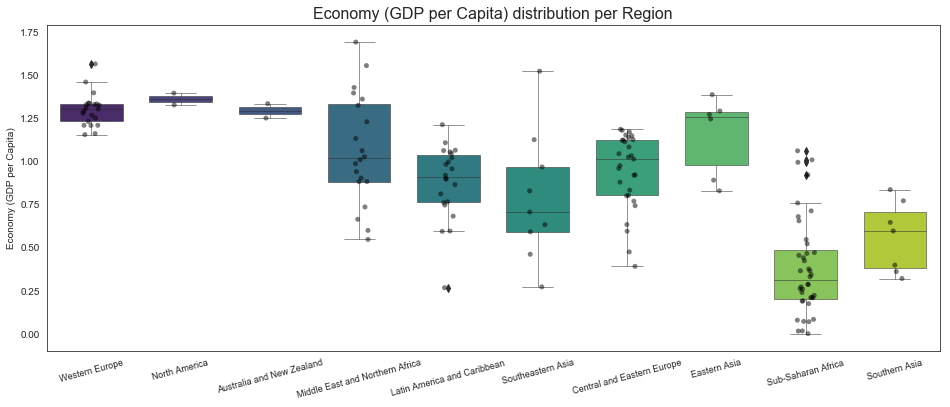

In [33]:
fig, ax = plt.subplots(figsize=(16,6))
bo=sns.boxplot(y='Economy (GDP per Capita)',x='Region',data=data,palette='viridis',width=0.7,linewidth=0.5)
bo.set_xlabel('');
bo.set_title(f'Economy (GDP per Capita) distribution per Region',fontsize=16);
bo.tick_params(axis='x', rotation=15,labelsize=9)
bo1=sns.stripplot(y='Economy (GDP per Capita)',x='Region',data=data, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')
bo1.set_xlabel('');

In [34]:
economy= data.groupby(['Region'])['Economy (GDP per Capita)'].agg(['min','max','std'])
economy['range'] = economy['max'] - economy['min']
economy =economy.sort_values(by=['range','std'],ascending=False).reset_index()
economy

,Region,min,max,std,range
0,Southeastern Asia,0.27108,1.52186,0.375874,1.25078
1,Middle East and Northern Africa,0.54649,1.69042,0.319014,1.14393
2,Sub-Saharan Africa,0.00000,1.06024,0.282264,1.06024
3,Latin America and Caribbean,0.26673,1.21183,0.214501,0.94510
4,Central and Eastern Europe,0.39047,1.18498,0.218499,0.79451
5,Eastern Asia,0.82819,1.38604,0.232465,0.55785
6,Southern Asia,0.31982,0.83524,0.205185,0.51542
7,Western Europe,1.15406,1.56391,0.096341,0.40985
8,Australia and New Zealand,1.25018,1.33358,0.058973,0.08340
9,North America,1.32629,1.39451,0.048239,0.06822


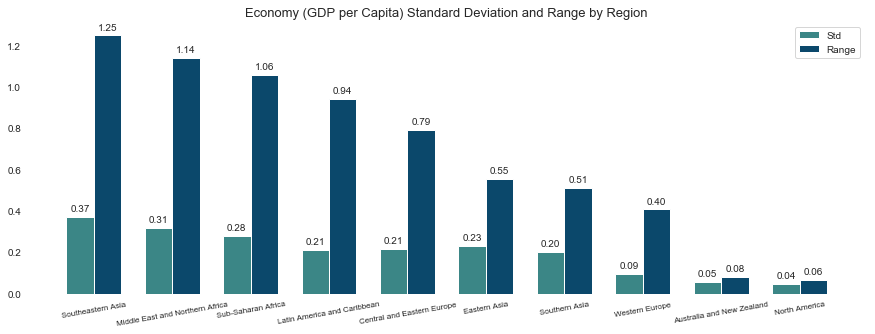

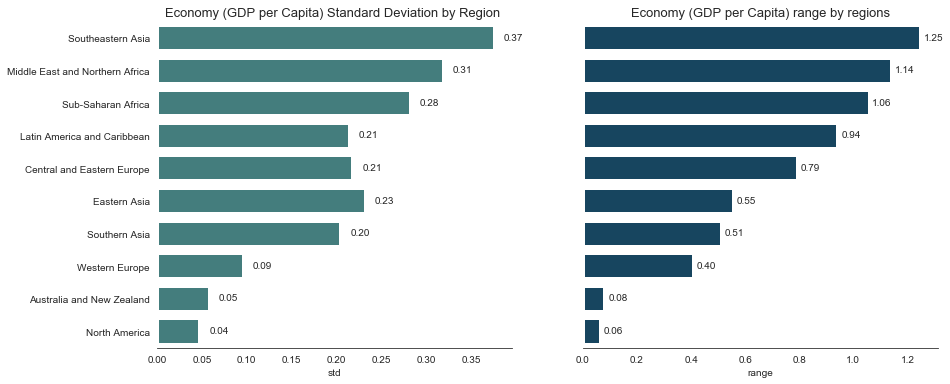

In [35]:
# We can see some outliers in Sub-Saharan Africa
labels = economy['Region']
stds = economy['std']
ranges = economy['range']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(15,5))
rects1 = ax.bar(x - width/2, stds, width, label='Std',color='#3b8686')
rects2 = ax.bar(x + width/2, ranges, width, label='Range',color='#0B486B')
ax.set_ylabel('')
ax.set_title('Economy (GDP per Capita) Standard Deviation and Range by Region',fontsize=13)
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=10,fontsize=8)
ax.legend()
autolabel(rects1),autolabel(rects2);
sns.despine(left=True,bottom=True);

fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
ax1 = sns.barplot(y='Region',x='std',data=economy,ax=ax[0],color='#3b8686',linewidth=4)
ax2 = sns.barplot(y='Region',x='range',data=economy,ax=ax[1],color='#0B486B',linewidth=4)
ax2.set_ylabel('');
ax1.set_ylabel('');
sns.despine(left=True);
ax1.set_title(f'Economy (GDP per Capita) Standard Deviation by Region ',fontsize=13);
ax2.set_title(f'Economy (GDP per Capita) range by regions',fontsize=13);
for i, v in enumerate(economy['std']):
    ax1.text(v+0.01 , i + .05, str(v)[:4])
for i, v in enumerate(economy['range']):
    ax2.text(v+0.01 , i + .05, str(v)[:4])

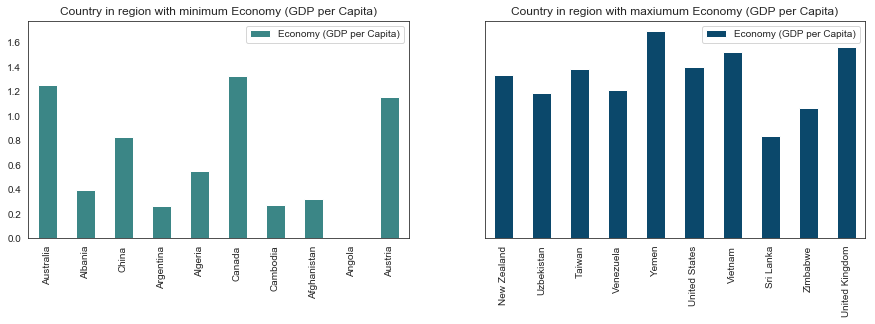

In [36]:
fig, ax = plt.subplots(1,2,figsize=(15,4),sharey=True)
op1= data.groupby('Region')['Country','Economy (GDP per Capita)'].agg('min').plot(kind='bar',ax=ax[0],x='Country',color='#3b8686');
op2= data.groupby('Region')['Country','Economy (GDP per Capita)'].agg('max').plot(kind='bar',ax=ax[1],x='Country',color='#0B486B');
op1.set_xlabel('');
op2.set_xlabel('');
op1.set_title('Country in region with minimum Economy (GDP per Capita)');
op2.set_title('Country in region with maxiumum Economy (GDP per Capita)');

In [37]:
data.groupby('Region')['Country','Economy (GDP per Capita)'].agg('min').T

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Country,Australia,Albania,China,Argentina,Algeria,Canada,Cambodia,Afghanistan,Angola,Austria
Economy (GDP per Capita),1.25018,0.39047,0.82819,0.26673,0.54649,1.32629,0.27108,0.31982,0,1.15406


In [38]:
data.groupby('Region')['Country','Economy (GDP per Capita)'].agg('max').T

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Country,New Zealand,Uzbekistan,Taiwan,Venezuela,Yemen,United States,Vietnam,Sri Lanka,Zimbabwe,United Kingdom
Economy (GDP per Capita),1.33358,1.18498,1.38604,1.21183,1.69042,1.39451,1.52186,0.83524,1.06024,1.56391


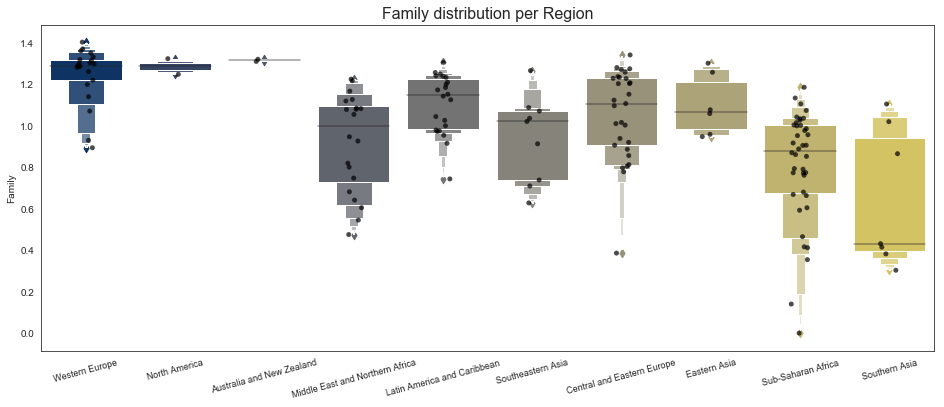

In [39]:
fig, ax = plt.subplots(figsize=(16,6))
bo9=sns.boxenplot(y='Family',x='Region',data=data,palette='cividis')
bo9.set_xlabel('');
bo9.set_title(f'Family distribution per Region',fontsize=16);
bo9.tick_params(axis='x', rotation=15,labelsize=9)
bo10=sns.stripplot(y='Family',x='Region',data=data, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.7,
                   color='black')
bo10.set_xlabel('');

In [40]:
family = data.groupby('Region')['Family'].agg('mean').to_frame().reset_index()
family.T

,0,1,2,3,4,5,6,7,8,9
Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Family,1.31445,1.05304,1.09943,1.10472,0.92049,1.28486,0.940468,0.645321,0.809085,1.2473


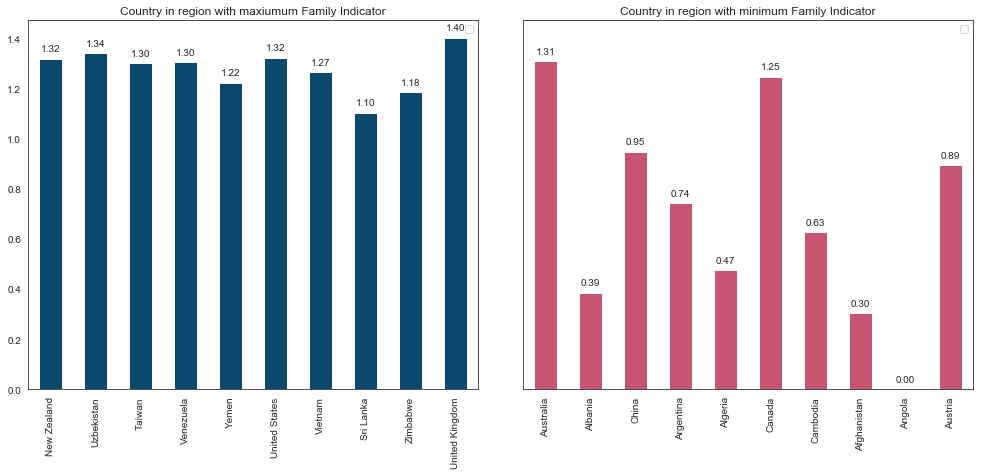

In [41]:
fig, ax = plt.subplots(1,2,figsize=(15,2.5),sharey=True)
op1= data.groupby('Region')['Country','Family'].agg('min').plot(kind='bar',ax=ax[1],x='Country',color='#c55572');
#op1.invert_xaxis()
op2= data.groupby('Region')['Country','Family'].agg('max').plot(kind='bar',ax=ax[0],x='Country',color='#0B486B');
op1.set_xlabel('');
op2.set_xlabel('');
op1.set_ylabel('');
op2.set_ylabel('');
op1.set_title('Country in region with minimum Family Indicator');
op2.set_title('Country in region with maxiumum Family Indicator');
fig.subplots_adjust(top=2.25,bottom=0.2, right=1,hspace = 0.1,wspace = 0.1)
op1.legend('');
op2.legend('');
for p in op1.patches:
    op1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in op2.patches:
    op2.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [42]:
data.groupby('Region')['Country','Family'].agg('max').sort_values(by='Family',ascending=False)

,Country,Family
Region,,
Western Europe,United Kingdom,1.40223
Central and Eastern Europe,Uzbekistan,1.34043
North America,United States,1.32261
Australia and New Zealand,New Zealand,1.31967
Latin America and Caribbean,Venezuela,1.30477
Eastern Asia,Taiwan,1.30060
Southeastern Asia,Vietnam,1.26504
Middle East and Northern Africa,Yemen,1.22393
Sub-Saharan Africa,Zimbabwe,1.18468


In [43]:
data.groupby('Region')['Country','Family'].agg('min').sort_values(by='Family',ascending=True)

,Country,Family
Region,,
Sub-Saharan Africa,Angola,0.00000
Southern Asia,Afghanistan,0.30285
Central and Eastern Europe,Albania,0.38562
Middle East and Northern Africa,Algeria,0.47489
Southeastern Asia,Cambodia,0.62736
Latin America and Caribbean,Argentina,0.74302
Western Europe,Austria,0.89318
Eastern Asia,China,0.94675
North America,Canada,1.24711


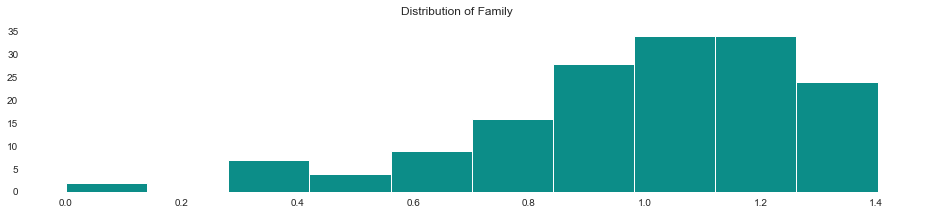

In [87]:
f,ax = plt.subplots(1,1,figsize=(16,3))
b0 = data['Family'].hist(color='#0c8d88',grid=False)
plt.suptitle('Distribution of Family');
sns.despine(left=True,bottom=True);

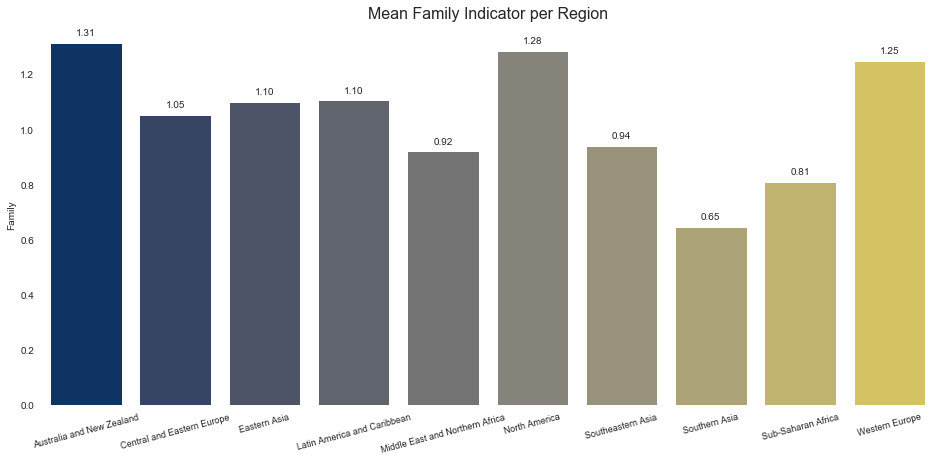

In [45]:
f,ax = plt.subplots(1,1,figsize=(16,7))
fa = sns.barplot(x=family['Region'],y=family['Family'],palette='cividis')
fa.set_xlabel('');
fa.set_title(f'Mean Family Indicator per Region',fontsize=16);
fa.tick_params(axis='x', rotation=15,labelsize=9)
sns.despine(left=True,bottom=True)
for p in fa.patches:
    fa.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

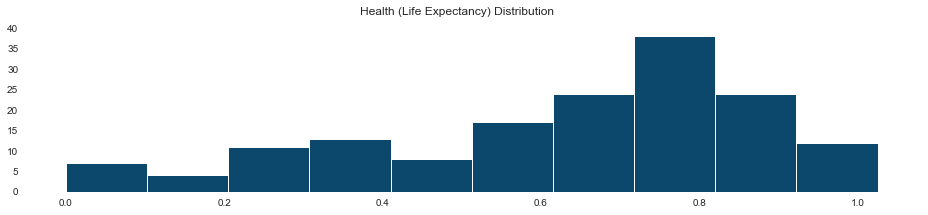

In [107]:
f,ax = plt.subplots(1,1,figsize=(16,3))
b0 = data['Health (Life Expectancy)'].hist(color='#0B486B',grid=False)
plt.suptitle('Health (Life Expectancy) Distribution');
sns.despine(left=True,bottom=True);

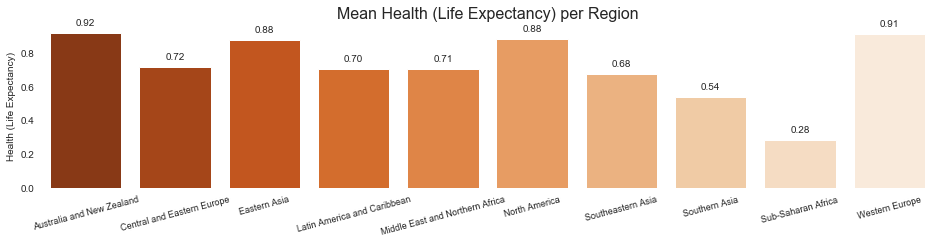

In [108]:
health = data.groupby('Region')['Health (Life Expectancy)'].agg('mean').to_frame().reset_index()
f,ax = plt.subplots(1,1,figsize=(16,3))
ha = sns.barplot(x=health['Region'],y=health['Health (Life Expectancy)'],palette='Oranges_r')
ha.set_xlabel('');
ha.set_title(f'Mean Health (Life Expectancy) per Region',fontsize=16);
ha.tick_params(axis='x', rotation=15,labelsize=9)
sns.despine(left=True,bottom=True)
for p in ha.patches:
    ha.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

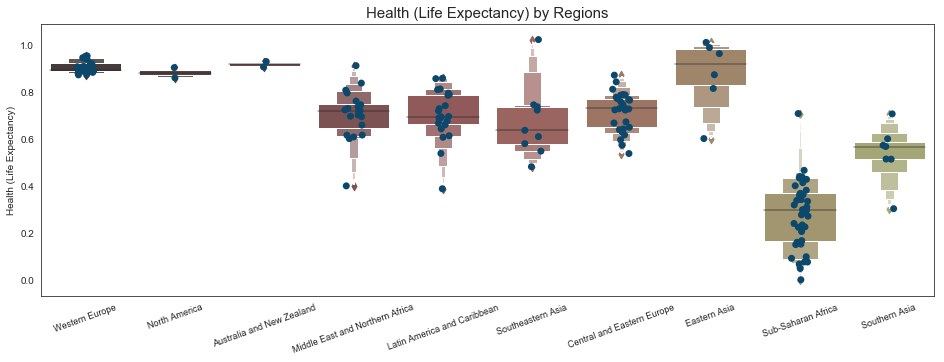

In [109]:
f,ax = plt.subplots(1,1,figsize=(16,5))
sp01 = sns.boxenplot(x="Region", y="Health (Life Expectancy)", data=data, palette='tab20b_d',saturation=0.6)
sp0 = sns.stripplot(x="Region", y="Health (Life Expectancy)", data=data, jitter=True,palette=['#0B486B'],size=7)
plt.xticks(rotation=20,fontsize=9);
plt.xlabel('');
sp0.set_title('Health (Life Expectancy) by Regions',fontsize=15);

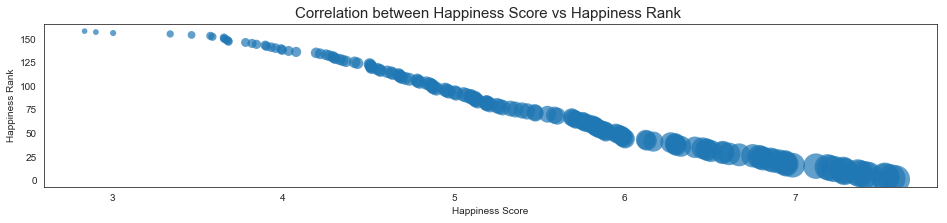

In [46]:
p4 = dict(zip(list(data['Region'].unique()),
                   sns.color_palette("Blues",11)))

cor4 = round(data['Happiness Score'].corr(data['Happiness Rank']),2)
f,ax = plt.subplots(1,1,figsize=(16,3))
x0 = sns.scatterplot(data['Happiness Score'], data['Happiness Rank'], 
                     palette=p4,sizes=(60, 300), linewidth=0,alpha=0.7
                    ,s=(data['Happiness Score']**3.3));
plt.xlabel("Happiness Score");
plt.ylabel("Happiness Rank");
plt.title(f'Correlation between Happiness Score vs Happiness Rank ', fontsize=15);

__It may look strange but i checked correlation between Happiness Score and Happiness Rank :) And it's 100% linear negative corelated__

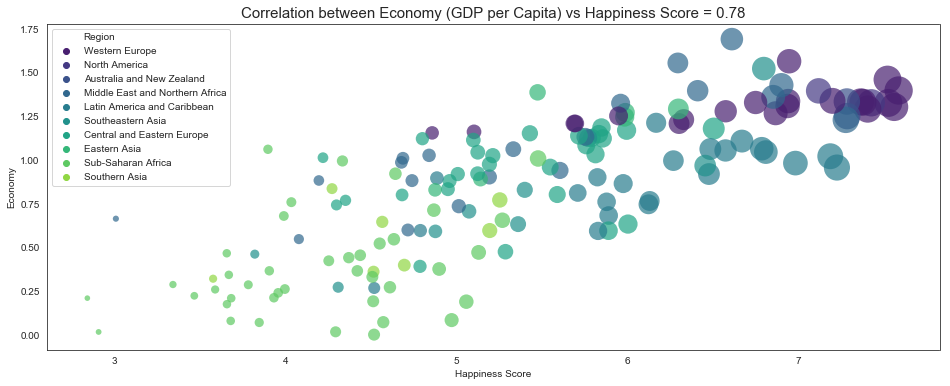

In [47]:
p1 = dict(zip(list(data['Region'].unique()),
                   sns.color_palette("viridis",11)))

cor1 = round(data['Happiness Score'].corr(data['Economy (GDP per Capita)']),2)
f,ax = plt.subplots(1,1,figsize=(16,6))
x0 = sns.scatterplot(data['Happiness Score'], data['Economy (GDP per Capita)'], 
                     palette=p1,hue=data['Region'],sizes=(60, 300), linewidth=0,alpha=0.7
                    ,s=(data['Happiness Score']**3.3));
plt.xlabel("Happiness Score");
plt.ylabel("Economy");
plt.title(f'Correlation between Economy (GDP per Capita) vs Happiness Score = {cor1}', fontsize=15);

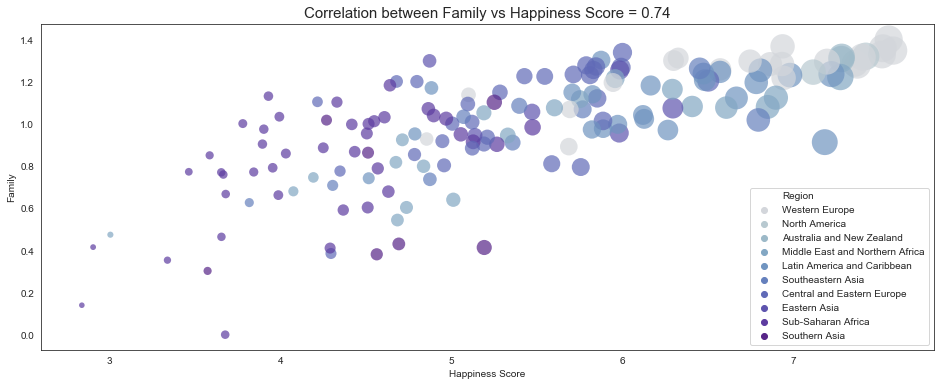

In [48]:
p2 = dict(zip(list(data['Region'].unique()),
                   sns.color_palette("twilight",25)))

cor2 = round(data['Happiness Score'].corr(data['Family']),2)
f,ax = plt.subplots(1,1,figsize=(16,6))
x0 = sns.scatterplot(data['Happiness Score'], data['Family'], 
                     palette=p2,hue=data['Region'],sizes=(60, 300), linewidth=0,alpha=0.7
                    ,s=(data['Happiness Score']**3.3));
plt.xlabel("Happiness Score");
plt.ylabel("Family");
plt.title(f'Correlation between Family vs Happiness Score = {cor2}', fontsize=15);

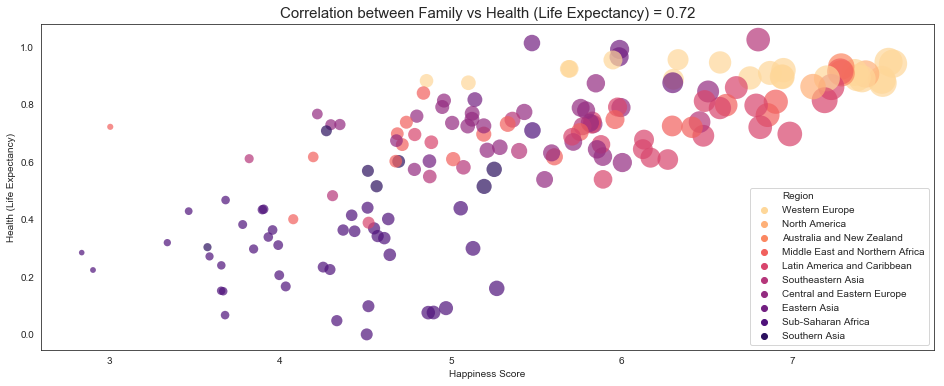

In [49]:
p3 = dict(zip(list(data['Region'].unique()),
                   sns.color_palette("magma_r",11)))

cor3 = round(data['Happiness Score'].corr(data['Health (Life Expectancy)']),2)
f,ax = plt.subplots(1,1,figsize=(16,6))
x0 = sns.scatterplot(data['Happiness Score'], data['Health (Life Expectancy)'], 
                     palette=p3,hue=data['Region'],sizes=(60, 300), linewidth=0,alpha=0.7
                    ,s=(data['Happiness Score']**3.3));
plt.xlabel("Happiness Score");
plt.ylabel("Health (Life Expectancy)");
plt.title(f'Correlation between Family vs Health (Life Expectancy) = {cor3}', fontsize=15);

* We can see very strong correlation between GDP per Capita and Happiness Score. So GDP has very big impact on Happiness.  
* We can also see very strong correlation between Family and Happiness Score. 
* We can also see very strong correlation between Health and Happiness Score.   

__This 3 factors seems to have the biggest influence on Happiness__

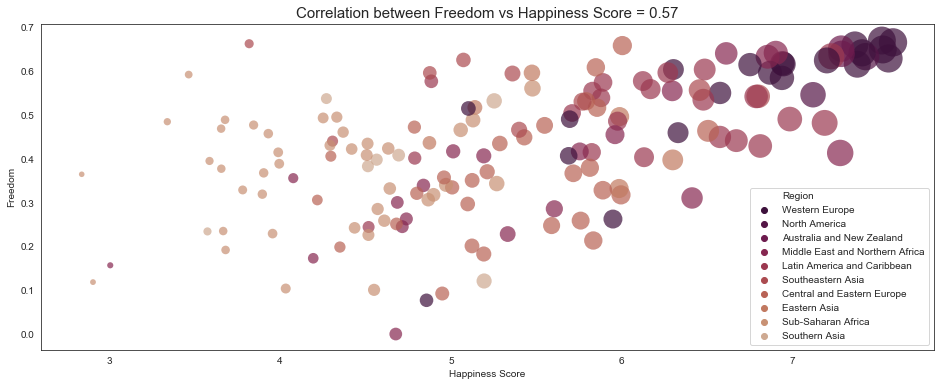

In [51]:
p5 = dict(zip(list(data['Region'].unique()),
                   sns.color_palette("twilight_shifted_r",25)))

cor5 = round(data['Happiness Score'].corr(data['Freedom']),2)
f,ax = plt.subplots(1,1,figsize=(16,6))
x0 = sns.scatterplot(data['Happiness Score'], data['Freedom'], 
                     palette=p5,hue=data['Region'],sizes=(60, 300), linewidth=0,alpha=0.7
                    ,s=(data['Happiness Score']**3.3));
plt.xlabel("Happiness Score");
plt.ylabel("Freedom");
plt.title(f'Correlation between Freedom vs Happiness Score = {cor5}', fontsize=15);

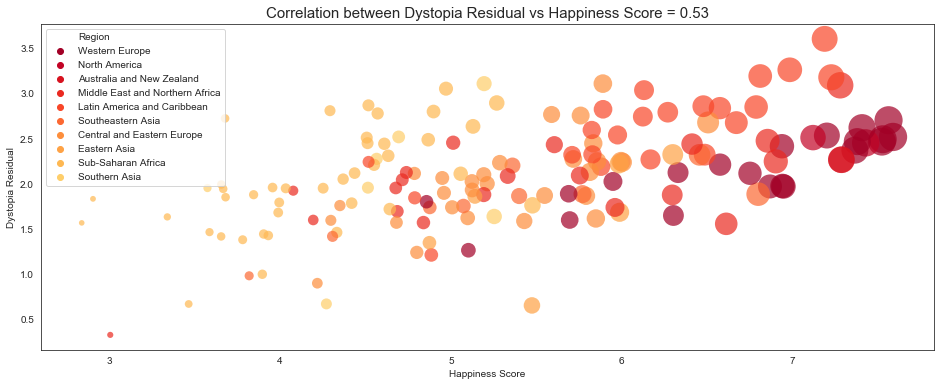

In [52]:
p6 = dict(zip(list(data['Region'].unique()),
                   sns.color_palette("YlOrRd_r",13)))

cor6 = round(data['Happiness Score'].corr(data['Dystopia Residual']),2)
f,ax = plt.subplots(1,1,figsize=(16,6))
x0 = sns.scatterplot(data['Happiness Score'], data['Dystopia Residual'], 
                     palette=p6,hue=data['Region'],sizes=(60, 300), linewidth=0,alpha=0.7
                    ,s=(data['Happiness Score']**3.3));
plt.xlabel("Happiness Score");
plt.ylabel("Dystopia Residual");
plt.title(f'Correlation between Dystopia Residual vs Happiness Score = {cor6}', fontsize=15);

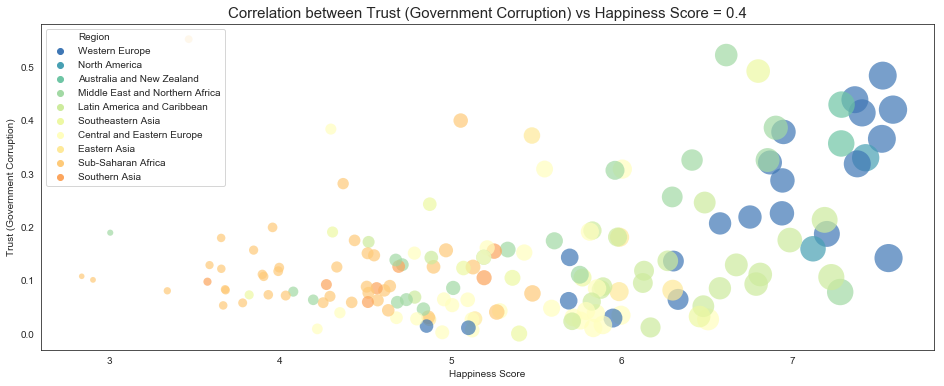

In [53]:
p7 = dict(zip(list(data['Region'].unique()),
                   sns.color_palette("Spectral_r",13)))

cor7 = round(data['Happiness Score'].corr(data['Trust (Government Corruption)']),2)
f,ax = plt.subplots(1,1,figsize=(16,6))
x0 = sns.scatterplot(data['Happiness Score'], data['Trust (Government Corruption)'], 
                     palette=p7,hue=data['Region'],sizes=(60, 300), linewidth=0,alpha=0.7
                    ,s=(data['Happiness Score']**3.3));
plt.xlabel("Happiness Score");
plt.ylabel("Trust (Government Corruption)");
plt.title(f'Correlation between Trust (Government Corruption) vs Happiness Score = {cor7}', fontsize=15);